In [45]:
import pandas as pd

# Étape n°1 : Récupérer les jeux de données

In [46]:
df_anim = pd.read_csv("FAO_animals.csv")

In [47]:
df_anim.head(2)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value


In [48]:
df_veg = pd.read_csv("FAO_vegetals.csv")

In [49]:
df_veg.head(2)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value


In [50]:
df_pop = pd.read_csv("FAO_population.csv")

In [51]:
df_pop.head(2)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations


# Étape n°2 : Nettoyage et préparation des données

1. Nettoyer les titres de colonnes :
- Supprimer les espaces au début et à la fin des titres (s’il y en a)
- Remplacer les espaces par des underscores (ceux se situant entre les mots)
- Tout mettre en minuscule


In [52]:

# Pour supprimer les espaces au début et à la fin des titres
df_anim.columns = df_anim.columns.str.strip()

# Pour remplacer les espaces par des underscores
df_anim.columns = df_anim.columns.str.replace(' ', '_')

# Pour tout mettre en minuscule
df_anim.columns = df_anim.columns.str.lower()


df_veg.columns = df_veg.columns.str.strip()
df_veg.columns = df_veg.columns.str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.lower()



df_pop.columns = df_pop.columns.str.strip()
df_pop.columns = df_pop.columns.str.replace(' ', '_')
df_pop.columns = df_pop.columns.str.lower()



2. Quelle sont les dimensions des jeux de données ?

In [53]:
df_anim.shape

(31542, 14)

In [54]:
df_veg.shape

(93458, 14)

In [55]:
df_pop.shape

(366, 14)

3. A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [56]:
df_anim.head(5)
# .tail pour prendre les dernières lignes

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [57]:
df_veg.head(5)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [58]:
df_pop.head(5)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


4. Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [59]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"

In [60]:
product = pd.concat([df_anim,df_veg], axis=0)

In [61]:
product

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(fao),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value,animal
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value,animal
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value,animal
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value,animal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93453,FBS,Food Balances (2010-),181,Zimbabwe,664,Food supply (kcal/capita/day),2899,Miscellaneous,2019,2019,kcal/capita/day,2.94,E,Estimated value,vegetal
93454,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2899,Miscellaneous,2018,2018,g/capita/day,0.04,E,Estimated value,vegetal
93455,FBS,Food Balances (2010-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2899,Miscellaneous,2019,2019,g/capita/day,0.09,E,Estimated value,vegetal
93456,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2899,Miscellaneous,2018,2018,g/capita/day,0.01,E,Estimated value,vegetal


5. Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.

In [62]:
df_pop_clean = df_pop.drop(["domain_code","domain","element_code","element","item_code_(fao)","item","year_code","unit","flag","flag_description"], axis=1)
# ou alors faire une liste de ce que l'on veut garder
# cols = ["area_code_(fao)", "area", "year", "pop_1000_hab"]
# df_pop = df_pop[cols]

In [63]:
df_pop_clean = df_pop_clean.rename(columns={"value" : "pop_1000_hab"})

In [64]:
df_pop_clean

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00
...,...,...,...,...
361,249,Yemen,2019,29161.92
362,251,Zambia,2018,17352.00
363,251,Zambia,2019,17861.03
364,181,Zimbabwe,2018,14438.80


6. Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.


In [65]:
product_clean = product.drop(["domain_code","domain","element_code","item_code_(fao)","year_code","flag","flag_description"], axis=1)

In [66]:
product_clean

,area_code_(fao),area,element,item,year,unit,value,type
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,kg,2.62,animal
1,2,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,kg,2.73,animal
2,2,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,kcal/capita/day,15.42,animal
3,2,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,kcal/capita/day,16.03,animal
4,2,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,g/capita/day,1.09,animal
...,...,...,...,...,...,...,...,...
93453,181,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,kcal/capita/day,2.94,vegetal
93454,181,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,g/capita/day,0.04,vegetal
93455,181,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,g/capita/day,0.09,vegetal
93456,181,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,g/capita/day,0.01,vegetal


7. Fusionnez df_pop avec products et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur la capture d’écran ci-dessous.

In [67]:
df = pd.merge(product_clean, df_pop_clean, on=['area_code_(fao)', 'area', 'year'])

8. Quelles sont les types de données de chaque colonne ?

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 124999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code_(fao)  125000 non-null  int64  
 1   area             125000 non-null  object 
 2   element          125000 non-null  object 
 3   item             125000 non-null  object 
 4   year             125000 non-null  int64  
 5   unit             125000 non-null  object 
 6   value            125000 non-null  float64
 7   type             125000 non-null  object 
 8   pop_1000_hab     125000 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 9.5+ MB


In [69]:
df.dtypes

area_code_(fao)      int64
area                object
element             object
item                object
year                 int64
unit                object
value              float64
type                object
pop_1000_hab       float64
dtype: object

9. Combien y-a t’il de valeurs manquantes par variable ?

In [70]:
df.isna().sum()

area_code_(fao)    0
area               0
element            0
item               0
year               0
unit               0
value              0
type               0
pop_1000_hab       0
dtype: int64

10. Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.


In [71]:
df.describe()

,area_code_(fao),year,value,pop_1000_hab
count,125000.000000,125000.000000,125000.000000,1.250000e+05
mean,128.742184,2018.508584,11.001024,5.143125e+04
std,75.250822,0.499928,56.218072,1.872539e+05
min,1.000000,2018.000000,-0.030000,1.076000e+01
25%,66.000000,2018.000000,0.000000,2.801000e+03
50%,124.000000,2019.000000,0.190000,9.965000e+03
75%,191.000000,2019.000000,2.800000,3.182529e+04
max,351.000000,2019.000000,1779.760000,1.465634e+06


11. Affichez les valeurs uniques de la colonne area

In [72]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

12. Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

13. Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [73]:
pivot_table = pd.pivot_table(df, index=["area_code_(fao)", "area", "year", "pop_1000_hab", "type", "item"], columns="element", values="value")


In [74]:
pivot_table = pivot_table.reset_index()
df = pivot_table

14. Faire du nettoyage dans le nom des colonnes
À ce stade votre jeu de données doit ressembler à cela :


In [75]:
df

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.00,0.01,0.00,0.00
1,1,Armenia,2018,2951.74,animal,Aquatic Plants,0.00,0.00,0.00,0.00
2,1,Armenia,2018,2951.74,animal,Bovine Meat,11.65,148.82,24.91,10.27
3,1,Armenia,2018,2951.74,animal,"Butter, Ghee",3.54,31.33,1.59,0.04
4,1,Armenia,2018,2951.74,animal,Cephalopods,0.00,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,1465634.16,vegetal,Tomatoes and products,0.29,18.70,35.75,1.07
31424,351,China,2019,1465634.16,vegetal,"Vegetables, other",1.93,213.68,321.88,12.39
31425,351,China,2019,1465634.16,vegetal,Wheat and products,3.15,580.98,66.52,18.65
31426,351,China,2019,1465634.16,vegetal,Wine,0.00,3.48,1.86,0.00


15. Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018


In [76]:
# On va créer un mask pour ne garder que l'année 2018
mask = df["year"] == 2018

# On applique le mask pour ne garder que les lignes qui correspondent à l'année 2018
df_2018 = df[mask]

In [77]:
df_2018

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.00,0.01,0.00,0.00
1,1,Armenia,2018,2951.74,animal,Aquatic Plants,0.00,0.00,0.00,0.00
2,1,Armenia,2018,2951.74,animal,Bovine Meat,11.65,148.82,24.91,10.27
3,1,Armenia,2018,2951.74,animal,"Butter, Ghee",3.54,31.33,1.59,0.04
4,1,Armenia,2018,2951.74,animal,Cephalopods,0.00,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
31330,351,China,2018,1459378.00,vegetal,Tomatoes and products,0.28,18.18,34.76,1.04
31331,351,China,2018,1459378.00,vegetal,"Vegetables, other",1.91,220.58,325.49,12.58
31332,351,China,2018,1459378.00,vegetal,Wheat and products,3.10,573.06,65.68,18.38
31333,351,China,2018,1459378.00,vegetal,Wine,0.00,3.50,1.87,0.00


16. Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. Pour cela rendez-vous sur le site de la FAO, votre objectif est de télécharger des nouveaux datasets pour ajouter les zones suivantes à votre jeu de données : 'eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'

In [78]:
df_autria_new_zealand = pd.read_csv("FAO_Australia_New_Zealand.csv")
df_caribbean = pd.read_csv("FAO_Caribbean.csv")
df_central_america = pd.read_csv("FAO_Central_America.csv")
df_central_asia = pd.read_csv("FAO_Central_Asia.csv")
df_eastern_africa = pd.read_csv("FAO_Eastern_Africa.csv")
df_eastern_asia = pd.read_csv("FAO_Eastern_Asia.csv")
df_eastern_europe = pd.read_csv("FAO_Eastern_Europe.csv")
df_melanesia = pd.read_csv("FAO_Melanesia.csv")
df_micronesia = pd.read_csv("FAO_Micronesia.csv")
df_middle_africa = pd.read_csv("FAO_Middle_Africa.csv")
df_northern_africa = pd.read_csv("FAO_Northern_Africa.csv")
df_northern_america = pd.read_csv("FAO_Northern_America.csv")
df_northern_europe = pd.read_csv("FAO_Northern_Europe.csv")
df_polynesia = pd.read_csv("FAO_Polynesia.csv")
df_south_america = pd.read_csv("FAO_South_America.csv")
df_south_eastern_asia = pd.read_csv("FAO_South_Eastern_Asia.csv")
df_southern_africa = pd.read_csv("FAO_Southern_Africa.csv")
df_southern_asia = pd.read_csv("FAO_Southern_Asia.csv")
df_southern_europe = pd.read_csv("FAO_Southern_Europe.csv")
df_western_africa = pd.read_csv("FAO_Western_Africa.csv")
df_western_asia = pd.read_csv("FAO_Western_Asia.csv")
df_western_europe = pd.read_csv("FAO_Western_Europe.csv")

In [79]:
files_csv = [df_autria_new_zealand, df_caribbean, df_central_america, df_central_asia, df_eastern_africa, df_eastern_asia, df_eastern_europe, df_melanesia, df_micronesia, df_middle_africa, df_northern_africa, df_northern_america, df_northern_europe, df_polynesia, df_south_america, df_south_eastern_asia, df_southern_africa, df_southern_asia, df_southern_europe, df_western_africa, df_western_asia, df_western_europe]
regions = ["autria_new_zealand","caribbean","central_america","central_asia","eastern_africa","eastern_asia","eastern_europe","melanesia","micronesia","middle_africa","northern_africa","northern_america","northern_europe","polynesia","south_america","south_eastern_asia","southern_africa","southern_asia","southern_europe","western_africa","western_asia","western_europe"]

In [80]:
df_autria_new_zealand

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),10,Australia,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,24898.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),10,Australia,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,25203.20,X,Figure from international organizations
2,FBS,Food Balances (2010-),156,New Zealand,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,4743.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),156,New Zealand,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,4783.06,X,Figure from international organizations


In [81]:
for file, region in zip(files_csv, regions):
    area_values = file["Area"]
    df.loc[df["area"].isin(area_values), "geographic_area"] = region
    df.loc[df["area"] == "China", "geographic_area"] = "eastern_asia"

In [82]:
df

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),geographic_area
0,1,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.00,0.01,0.00,0.00,western_asia
1,1,Armenia,2018,2951.74,animal,Aquatic Plants,0.00,0.00,0.00,0.00,western_asia
2,1,Armenia,2018,2951.74,animal,Bovine Meat,11.65,148.82,24.91,10.27,western_asia
3,1,Armenia,2018,2951.74,animal,"Butter, Ghee",3.54,31.33,1.59,0.04,western_asia
4,1,Armenia,2018,2951.74,animal,Cephalopods,0.00,0.01,0.00,0.00,western_asia
...,...,...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,1465634.16,vegetal,Tomatoes and products,0.29,18.70,35.75,1.07,eastern_asia
31424,351,China,2019,1465634.16,vegetal,"Vegetables, other",1.93,213.68,321.88,12.39,eastern_asia
31425,351,China,2019,1465634.16,vegetal,Wheat and products,3.15,580.98,66.52,18.65,eastern_asia
31426,351,China,2019,1465634.16,vegetal,Wine,0.00,3.48,1.86,0.00,eastern_asia


# Étape n°3: Exploration
Lorsqu’aucune précision n’est donnée, veuillez répondre en utilisant l’année la plus récente

1. Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.

In [83]:
df["Fat supply quantity (g/capita/day)"].describe()

count    31206.000000
mean         1.072235
std          3.486319
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         83.770000
Name: Fat supply quantity (g/capita/day), dtype: float64

Pour la quantité d'approvisionnement en graisses :
- le premier quartile est 0.000000
- le troisième quartile est 0.360000
- la moyenne est 1.072235
- l'écart type est 3.486319

2. Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

In [84]:
df["Fat supply quantity (g/capita/day)"].describe()

count    31206.000000
mean         1.072235
std          3.486319
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         83.770000
Name: Fat supply quantity (g/capita/day), dtype: float64

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 445.578)

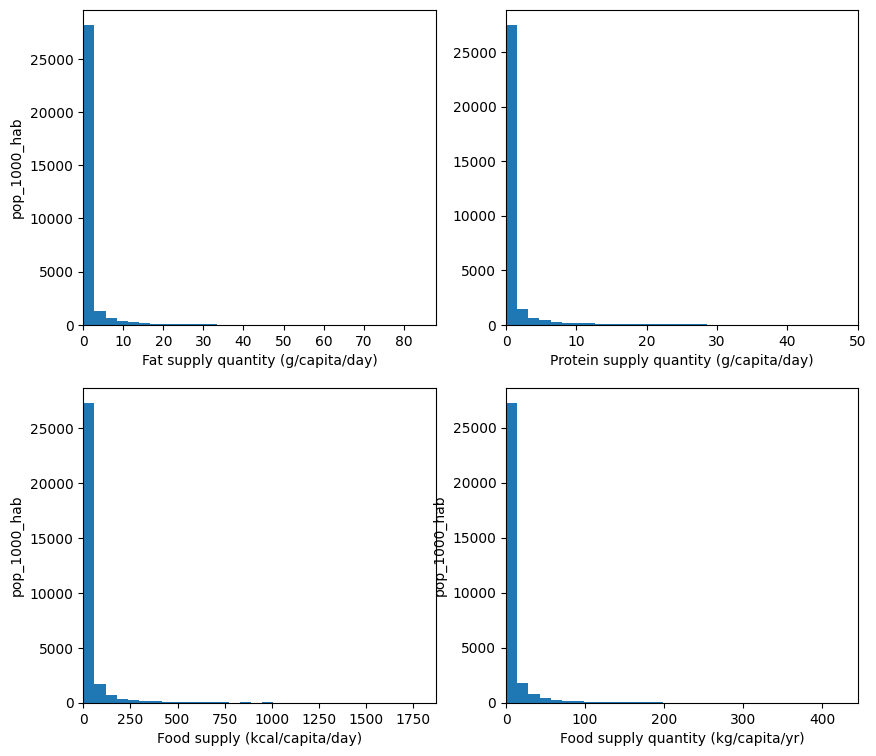

In [86]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
f.set_size_inches(10, 9)

ax1.hist(x=df["Fat supply quantity (g/capita/day)"], bins=30)
ax1.set_ylabel("pop_1000_hab")
ax1.set_xlabel("Fat supply quantity (g/capita/day)")

ax1.set_xticks(range(0, 90 , 10))

ax1.set_xlim(left=0)

ax2.hist(x=df["Protein supply quantity (g/capita/day)"], bins=30)
ax2.set_xlabel("Protein supply quantity (g/capita/day)")
ax2.set_xlim(left=0)

ax3.hist(x=df["Food supply (kcal/capita/day)"], bins=30)
ax3.set_ylabel("pop_1000_hab")
ax3.set_xlabel("Food supply (kcal/capita/day)")
ax3.set_xlim(left=0)

ax4.hist(x=df["Food supply quantity (kg/capita/yr)"], bins=30)
ax4.set_ylabel("pop_1000_hab")
ax4.set_xlabel("Food supply quantity (kg/capita/yr)")
ax4.set_xlim(left=0)






3. Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [87]:
# On sélectionne dans notre df la ligne ou "area" est "Ukraine" et ensuite on sélectionne la ligne ou "year" est 2018
# ensuite on lui dit que de ces lignes il sélectionne uniquement la colonne "pop_1000_hab", avec iloc[0] on récupère la première valeur de cette colonne
# on multiplie par 1000 parce que la colonne "pop_1000_hab" donne la valeur de la population pour 1000 habitants
ukraine_pop = df.loc[(df["area"] == "Ukraine") & (df["year"] == 2018), "pop_1000_hab"].iloc[0] * 1000
print(int(ukraine_pop))

44246000


4. Quels sont les 10 pays les plus peuplés ?

In [88]:
df_sorted = df.sort_values(by="pop_1000_hab", ascending=False)
top_10_pays = df_sorted.head(10)["area"]
print(top_10_pays)


31427    China
31369    China
31360    China
31361    China
31362    China
31363    China
31364    China
31365    China
31366    China
31367    China
Name: area, dtype: object


5. Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ?

In [89]:
df_pop_clean

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00
...,...,...,...,...
361,249,Yemen,2019,29161.92
362,251,Zambia,2018,17352.00
363,251,Zambia,2019,17861.03
364,181,Zimbabwe,2018,14438.80


In [90]:
# Créer un DataFrame pour les données de 2018
df_pop_2018 = df_pop_clean.loc[df_pop_clean["year"] == 2018]

# Créer un DataFrame pour les données de 2019
df_pop_2019 = df_pop_clean.loc[df_pop_clean["year"] == 2019]


In [96]:
# Population mondiale en 2018
pop_mondial_2018 = df_pop_2018["pop_1000_hab"].sum() * 1000
pop_mondial_2018
print("Population mondiale en 2018 est de", pop_mondial_2018)

Population mondiale en 2018 est de 9032306240.0


In [97]:
# Population mondiale en 2019
pop_mondial_2019 = df_pop_2019["pop_1000_hab"].sum() * 1000
print("Population mondiale en 2019 est de", pop_mondial_2019)

Population mondiale en 2019 est de 9134446160.0


6. Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.

In [116]:
val_manq_pays = df.isna().sum().groupby(df["area"]).sum()
val_manq_pays

Series([], dtype: int64)

7. Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [121]:
df_pop_clean.isna().sum()

area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
dtype: int64

In [123]:
df_2018 = df_pop_clean.loc[df_pop_clean["year"] == 2018, ["area", "pop_1000_hab"]]
df_2019 = df_pop_clean.loc[df_pop_clean["year"] == 2019, ["area", "pop_1000_hab"]]




In [127]:
df_taux = df_2018.merge(df_2019, on="area", suffixes=("_2018", "_2019"))
df_taux

,area,pop_1000_hab_2018,pop_1000_hab_2019
0,Afghanistan,37172.0,38041.75
1,Albania,2883.0,2880.92
2,Algeria,42228.0,43053.05
3,Angola,30810.0,31825.29
4,Antigua and Barbuda,96.0,97.12
...,...,...,...
175,Venezuela (Bolivarian Republic of),28887.0,28515.83
176,Viet Nam,95546.0,96462.11
177,Yemen,28499.0,29161.92
178,Zambia,17352.0,17861.03


In [136]:
df_taux["taux_croissance_pop_18_19"] = ((df_taux["pop_1000_hab_2019"] - df_taux["pop_1000_hab_2018"]) / df_taux["pop_1000_hab_2018"]) * 100

# Arrondir le taux de croissance à deux décimales et ajouter le symbole %
df_taux["taux_croissance_pop_18_19"] = df_taux["taux_croissance_pop_18_19"].round(2).map("{:.2f}%".format)

df_taux

,area,pop_1000_hab_2018,pop_1000_hab_2019,taux_croissance_pop_18_19
0,Afghanistan,37172.0,38041.75,2.34%
1,Albania,2883.0,2880.92,-0.07%
2,Algeria,42228.0,43053.05,1.95%
3,Angola,30810.0,31825.29,3.30%
4,Antigua and Barbuda,96.0,97.12,1.17%
...,...,...,...,...
175,Venezuela (Bolivarian Republic of),28887.0,28515.83,-1.28%
176,Viet Nam,95546.0,96462.11,0.96%
177,Yemen,28499.0,29161.92,2.33%
178,Zambia,17352.0,17861.03,2.93%


In [137]:
taux_plus_haut = df_taux.groupby("area")["taux_croissance_pop_18_19"].last().sort_values(ascending=False).head(5)
taux_plus_haut

area
Niger                               3.87%
Uganda                              3.61%
Angola                              3.30%
Democratic Republic of the Congo    3.24%
Burundi                             3.18%
Name: taux_croissance_pop_18_19, dtype: object

8. Quel est le taux de croissance moyen en fonction de la zone géographique ?


In [157]:
df_taux_zone_geo = df[["area_code_(fao)", "area", "year", "pop_1000_hab", "geographic_area"]]
df_taux_zone_geo

element,area_code_(fao),area,year,pop_1000_hab,geographic_area
0,1,Armenia,2018,2951.74,western_asia
1,1,Armenia,2018,2951.74,western_asia
2,1,Armenia,2018,2951.74,western_asia
3,1,Armenia,2018,2951.74,western_asia
4,1,Armenia,2018,2951.74,western_asia
...,...,...,...,...,...
31423,351,China,2019,1465634.16,eastern_asia
31424,351,China,2019,1465634.16,eastern_asia
31425,351,China,2019,1465634.16,eastern_asia
31426,351,China,2019,1465634.16,eastern_asia


In [158]:
df_taux_zone_geo = df_taux_zone_geo.assign(taux_croissance = df_taux_zone_geo.groupby("geographic_area")["pop_1000_hab"].apply(lambda x: (x.iloc[1] - x.iloc[0])/x.iloc[0] * 100))
taux_moyen_zone_geo = df_taux_zone_geo.groupby("geographic_area")["taux_croissance"].mean().sort_values(ascending=False)

# Afficher les résultats
print(taux_moyen_zone_geo)


geographic_area
autria_new_zealand   NaN
caribbean            NaN
central_america      NaN
central_asia         NaN
eastern_africa       NaN
eastern_asia         NaN
eastern_europe       NaN
melanesia            NaN
micronesia           NaN
middle_africa        NaN
northern_africa      NaN
northern_america     NaN
northern_europe      NaN
polynesia            NaN
south_america        NaN
south_eastern_asia   NaN
southern_africa      NaN
southern_asia        NaN
southern_europe      NaN
western_africa       NaN
western_asia         NaN
western_europe       NaN
Name: taux_croissance, dtype: float64


In [159]:
count_by_zone_geo = df_taux_zone_geo.groupby("geographic_area").count()["pop_1000_hab"]
count_by_zone_geo

geographic_area
autria_new_zealand     350
caribbean             2230
central_america       1405
central_asia           808
eastern_africa        2733
eastern_asia          1581
eastern_europe        1655
melanesia              851
micronesia             288
middle_africa         1422
northern_africa       1052
northern_america       350
northern_europe       1672
polynesia              325
south_america         2078
south_eastern_asia    1564
southern_africa        876
southern_asia         1478
southern_europe       1996
western_africa        2801
western_asia          2744
western_europe        1169
Name: pop_1000_hab, dtype: int64